In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = ROOT.TFile.Open("BDTcheck_analysis_full.root")
if not file or file.IsZombie():
    raise RuntimeError("Could not open file or file is corrupted.")

#Retrieving histograms
hSig = file.Get("hSigTest")
hBkg = file.Get("hBkgTest")
if not file or not hBkg:
    raise RuntimeError("Could not find histograms in file.")

In [3]:
tcut = np.linspace(0.0, 1.0, 500)
tcut = tcut.tolist()

In [4]:
nSig = hSig.GetEntries()
nBkg = hBkg.GetEntries()

In [5]:
print(nSig, nBkg)

1048532.0 15652710.0


## Figure of Merit Calculation

In [6]:
fom = []

for cut in tcut:
    tbinSig = hSig.FindBin(cut)
    tbinBkg = hBkg.FindBin(cut)

    nSigSel = hSig.Integral(tbinSig, hSig.GetNbinsX())
    nBkgSel = hBkg.Integral(tbinBkg, hBkg.GetNbinsX())

    # for bin in range(tbinSig, hSig.GetNbinsX() + 1):
    #     nSigSel += hSig.GetBinContent(bin)
    # for bin in range(tbinBkg, hBkg.GetNbinsX() + 1):
    #     nBkgSel += hBkg.GetBinContent(bin)

    # sigEff = nSigSel/nSig if nSig > 0 else 0
    # bkgEff = nBkgSel/nBkg if nBkg > 0 else 0

    fig_merit = nSigSel/(nSigSel + nBkgSel)**(0.5) if (nSigSel+nBkgSel) > 0 else 0
    fom.append(fig_merit)


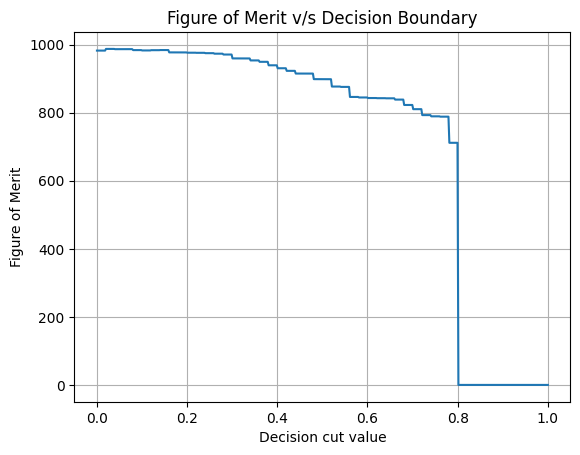

In [7]:
plt.plot(tcut, fom)
plt.title("Figure of Merit v/s Decision Boundary")
plt.ylabel("Figure of Merit")
plt.xlabel("Decision cut value")
plt.grid()
plt.show()

In [8]:
index = fom.index(max(fom))
print(f"Optimal decision bdry : {tcut[index]}")

Optimal decision bdry : 0.02004008016032064


From this, we find if we use figure of merit, then the optimal decision boundary is 0.0

## Punzi Merit

$$
S_{min} = \frac{a^2}{8} + \frac{9b^2}{13} + a\sqrt{B} + \frac{b}{2} \sqrt{b^2 + 4a\sqrt B + 4B}
$$
Goal is to minimize,
$$
\frac{S_{min}}{Signal\,Efficiency}
$$

In [12]:
a = 2
b = 5

punzi = []
tcut = np.linspace(0.0, 0.8, 100)
tcut = tcut.tolist()

In [13]:
for cut in tcut:
    tbinSig = hSig.FindBin(cut)
    tbinBkg = hBkg.FindBin(cut)

    nSigSel = hSig.Integral(tbinSig, hSig.GetNbinsX())
    nBkgSel = hBkg.Integral(tbinBkg, hBkg.GetNbinsX())

    B = nBkgSel
    S_min = (a**2/8) + (9*b**2/13) + (a*B**0.5) + ((b/2)*(b**2 + 4*a*B**0.5 + 4*B)**0.5)
    sigEff = nSigSel/nSig if nSig > 0 else 0

    fig = S_min/sigEff if sigEff > 0 else 0
    punzi.append(fig)


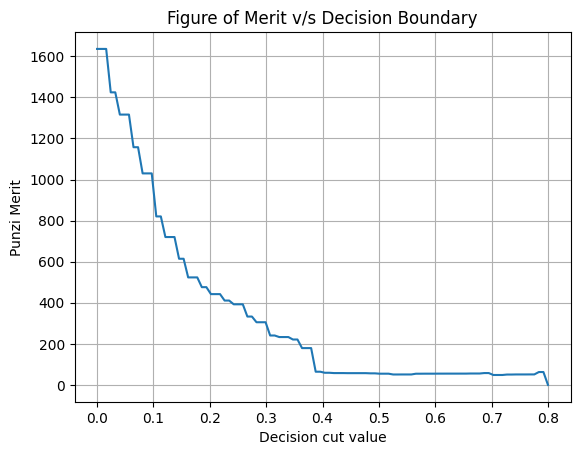

In [14]:
plt.plot(tcut, punzi)
plt.title("Figure of Merit v/s Decision Boundary")
plt.ylabel("Punzi Merit")
plt.xlabel("Decision cut value")
plt.grid()
plt.show()
#plt.savefig("punzi_fom_MLP.png")

In [15]:
#Finding the point with minimum values
index = punzi.index(min(punzi))
print(f"The optimal decision cut is : {tcut[index]}")

The optimal decision cut is : 0.8
